# Converting grib to netcdf
1. Download the grib archive
2. Converting the file to netcdf #For some reason I couldnt open the grib file directly in my computer using python
 2.1 Using cdo command line in the terminal to convert it 
     >>>cdo  --eccodes  -f nc copy originalfile.grib newfile.nc
     
     Note: If i don't use --eccodes, the variable names won't be saved eccodes its part of the ERA world:)

In this file using a list of coordinates, Plots for different pressure levels are made.


            



In [57]:
import pandas as pd
import xarray
import numpy as np
from matplotlib import pyplot as plt

In [8]:
import xarray as xr
#ds = xr.open_dataset('20190719y20.grib')

In [9]:
#import pygrib
file = '20190719y204.grib'
#grbs = pygrib.open(file)

In [39]:
import netCDF4
import pandas as pd
fn = '20190719y20.nc'
ds = netCDF4.Dataset(fn)
ds
ds.variables
vname = 't'
nc = netCDF4.Dataset(fn)
times = nc.variables['time']
h = nc.variables[vname]
jd = netCDF4.num2date(times[:],times.units)
jd
#h.unit

masked_array(data=[cftime.DatetimeGregorian(2019, 7, 19, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 1, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 2, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 3, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 4, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 5, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 7, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 8, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 9, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 10, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 11, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 12, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 7, 19, 13, 0, 0, 0),
                

In case you want to see what is inside
#nc.variables.items()

In [95]:
variables=list(nc.variables.keys())[4::]#the first 4 are lon,lat,t,pressure levels
coordinates=pd.read_csv('coordinates.csv')
LON=coordinates['longitude'].values.tolist()
LAT=coordinates['latitude'].values.tolist()
Plevs=np.array(nc.variables['plev'])


# Plotting Variable vs time for different pressure levels

<ipython-input-96-02b8e8fad9a3>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-96-02b8e8fad9a3>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,4))


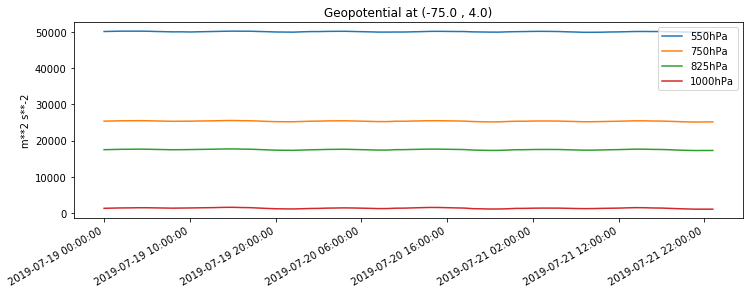

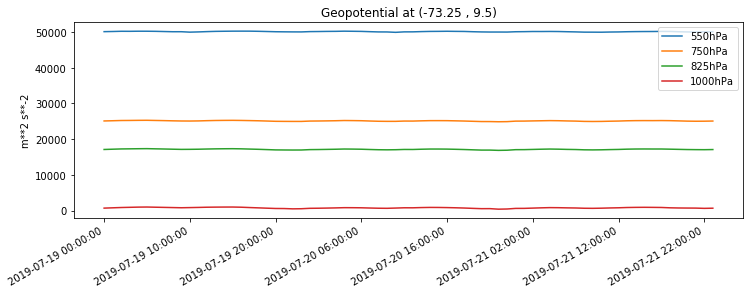

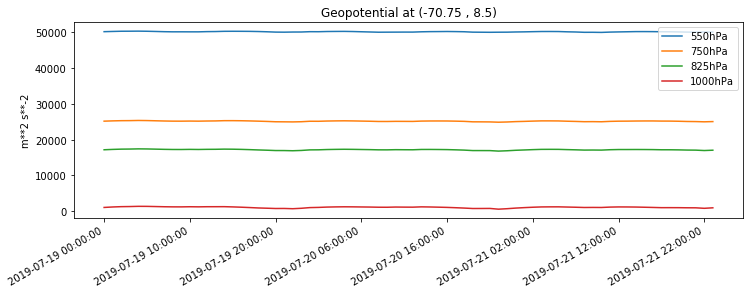

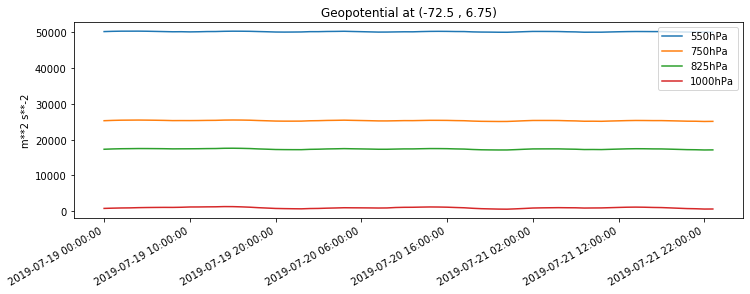

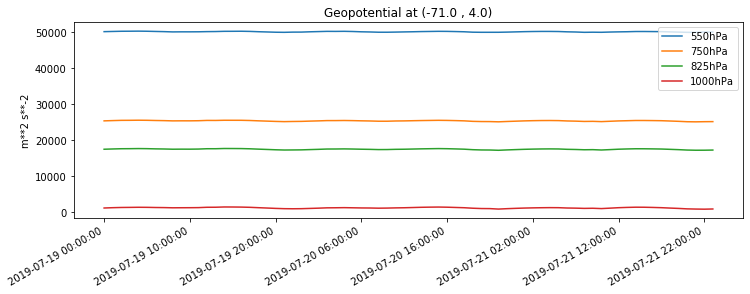

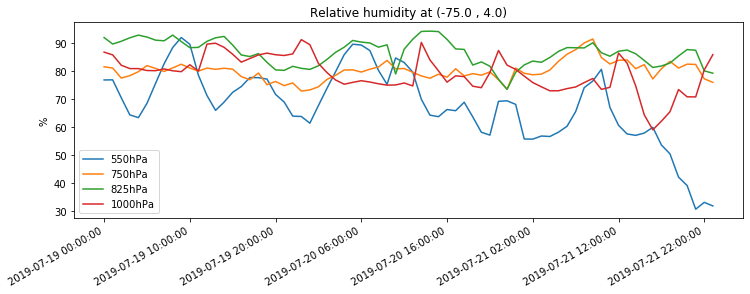

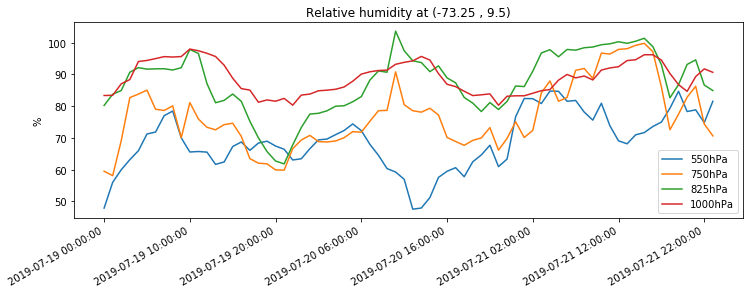

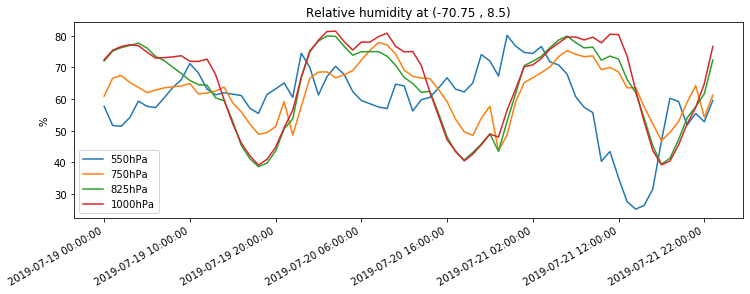

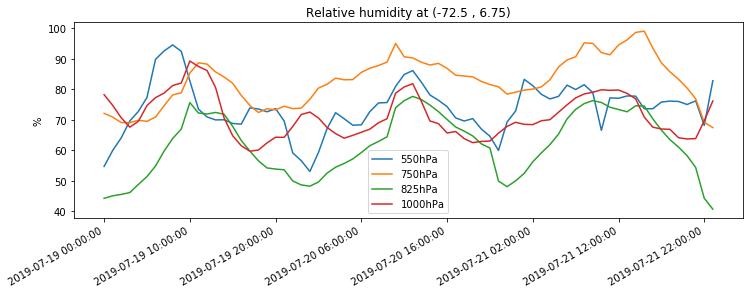

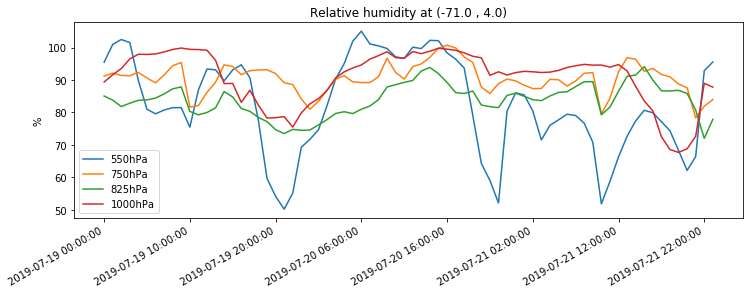

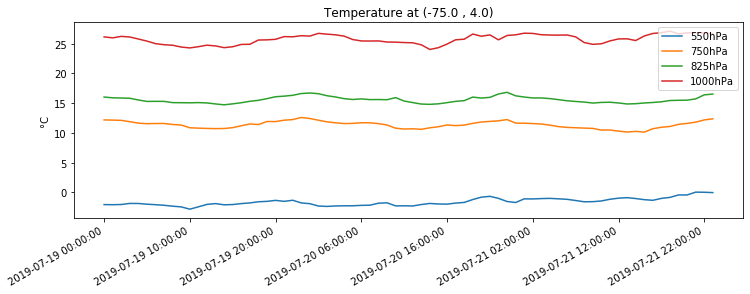

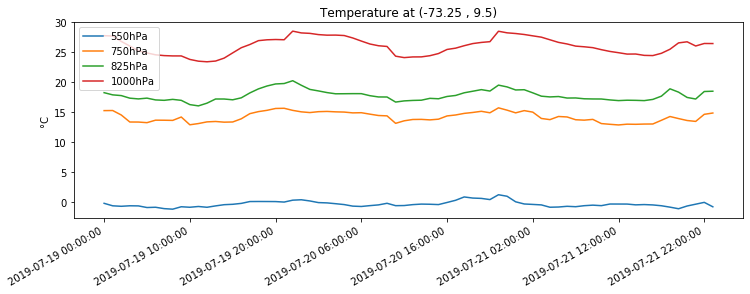

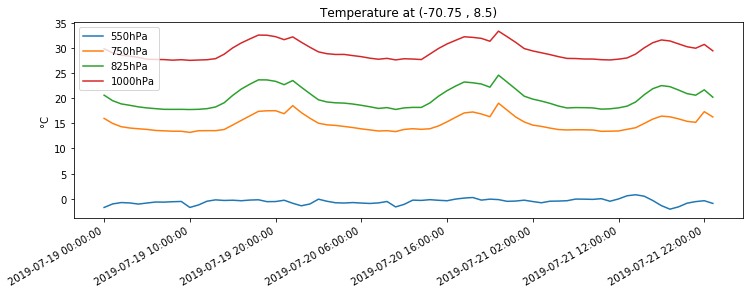

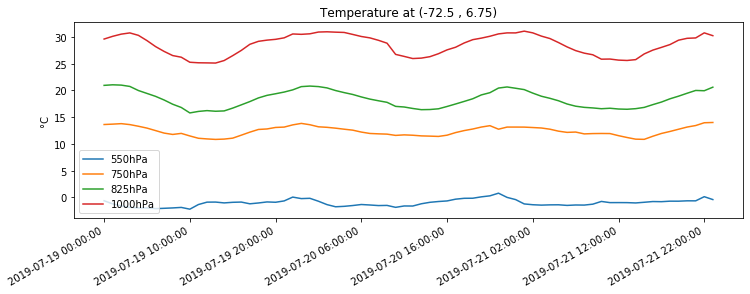

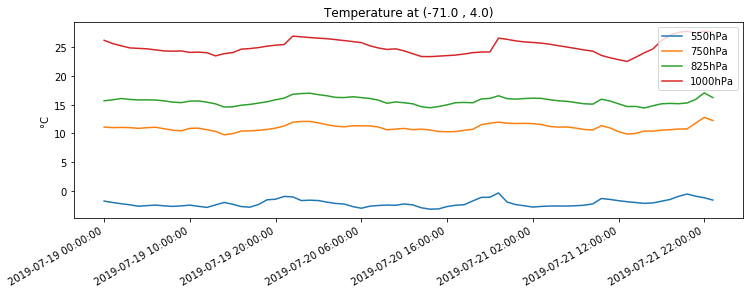

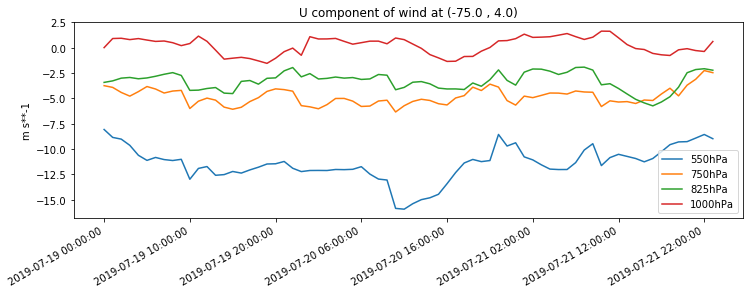

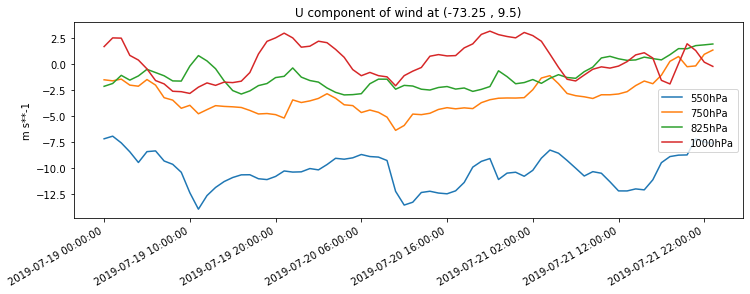

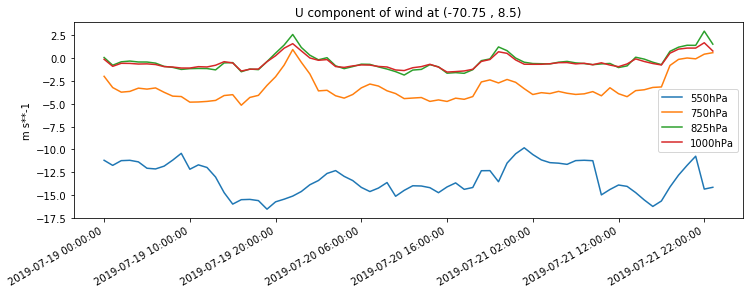

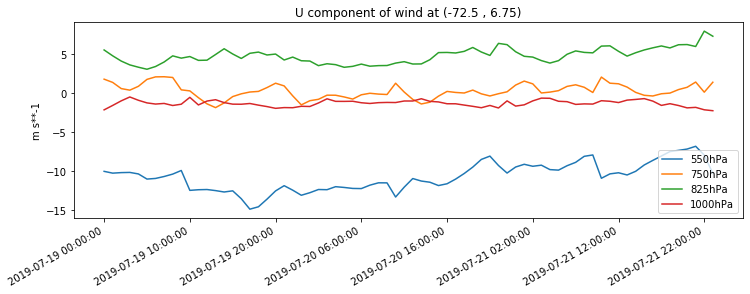

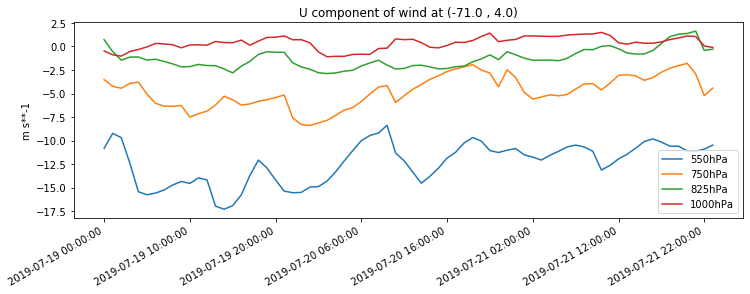

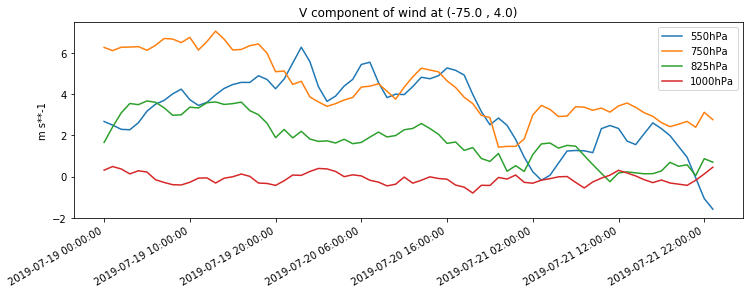

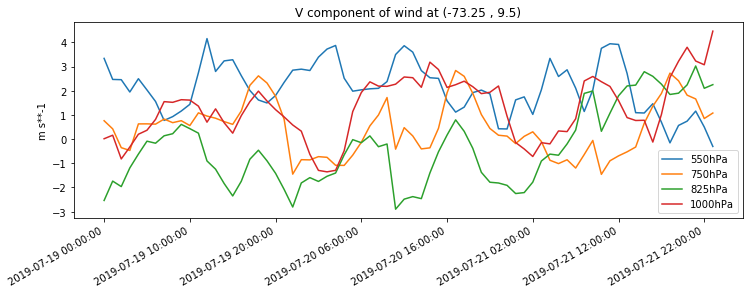

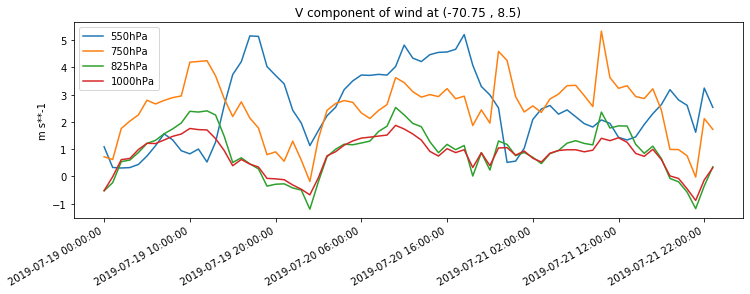

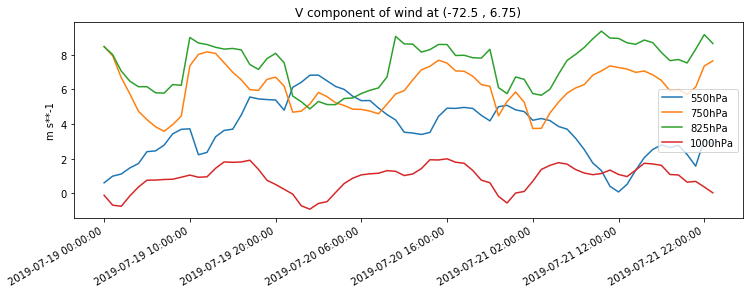

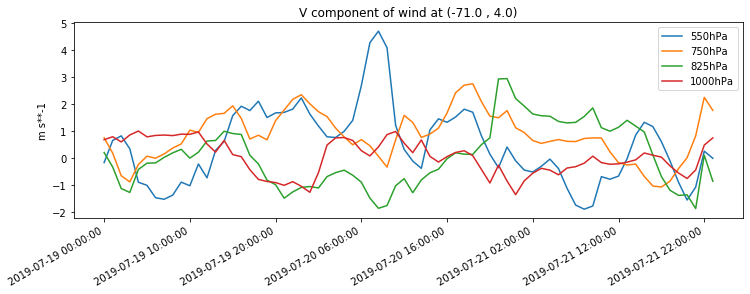

In [96]:
for vari in variables:
    for i in range(len(LON)):
        fig = plt.figure(figsize=(12,4))
        for k in Plevs[1::]:            
            lat=np.array(nc.variables['lat'])
            lon=np.array(nc.variables['lon'])
            Coord1=np.where(lon==LON[i])[0][0]
            Coord2=np.where(lat==LAT[i])[0][0]
            Plev=np.where(Plevs==k)[0][0] 
            Var=nc.variables[vari][:,Plev,Coord1,Coord2]
            units=nc.variables[vari].units
            if vari=='t':
                Var=Var-273.15
                units='°C'
            hs = pd.Series(Var,index=jd)            
            ax = fig.add_subplot(111)
            hs.plot(ax=ax,title='%s at (%s , %s)' % (nc.variables[vari].long_name,LON[i],LAT[i]),label=str(int(k/100))+'hPa')
            plt.legend()
            ax.set_ylabel(units)  
        fig.autofmt_xdate()
        plt.savefig('graphs/byPressure'+vari+str(LON[i])+'_'+str(LAT[i])+'plevs.png')   


# Plotting Different Variables for the same coordinate  P=P0






<ipython-input-97-5e625453b199>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


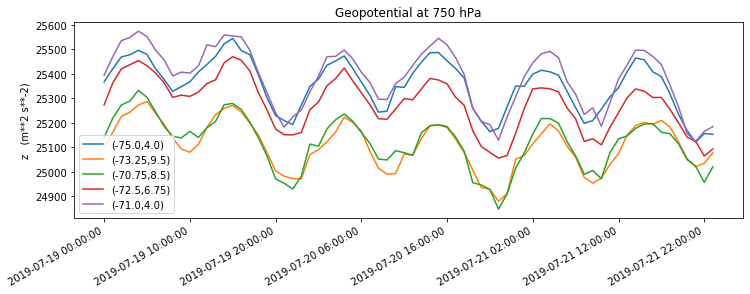

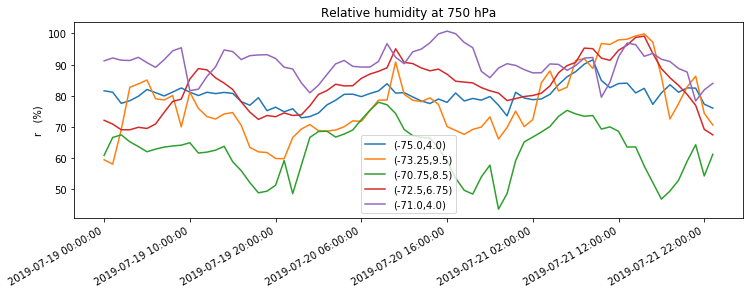

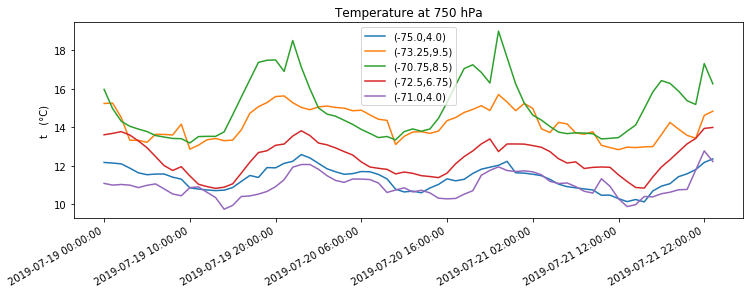

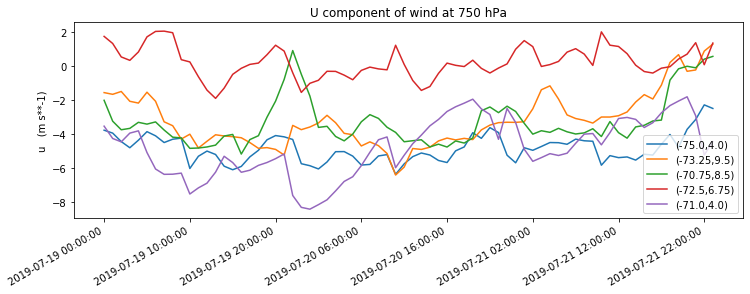

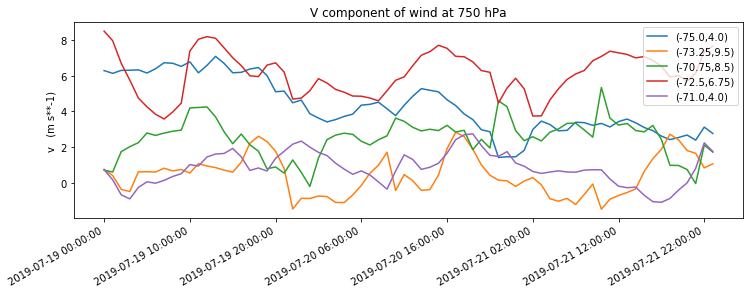

In [97]:
P0=75000
for vari in variables:
    fig = plt.figure(figsize=(12,4))
    for i in range(len(LON)):
            lat=np.array(nc.variables['lat'])
            lon=np.array(nc.variables['lon'])
            Coord1=np.where(lon==LON[i])[0][0]
            Coord2=np.where(lat==LAT[i])[0][0]
            Plev=np.where(Plevs==P0)[0][0] 
            Var=np.array(nc.variables[vari])
            Var=nc.variables[vari][:,Plev,Coord1,Coord2]
            units=nc.variables[vari].units
            if vari=='t':
                Var=Var-273.15
                units='°C'            
            hs = pd.Series(Var,index=jd)            
            ax = fig.add_subplot(111)
            hs.plot(ax=ax,title='%s at %s hPa' % (nc.variables[vari].long_name,int(P0/100)),label='(%s,%s)'%(LON[i],LAT[i]))
            plt.legend()
            ax.set_ylabel('%s   (%s)'%(vari,units))
    fig.autofmt_xdate()        
    plt.savefig('graphs/byCoordinates/ '+vari+str(P0)+'.png')   
            
#plt.show()            


In [98]:
lat

array([10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,
        7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,
        5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,
        3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,
        1.  ,  0.75,  0.5 ,  0.25,  0.  ])

In [99]:
lon

array([-78.  , -77.75, -77.5 , -77.25, -77.  , -76.75, -76.5 , -76.25,
       -76.  , -75.75, -75.5 , -75.25, -75.  , -74.75, -74.5 , -74.25,
       -74.  , -73.75, -73.5 , -73.25, -73.  , -72.75, -72.5 , -72.25,
       -72.  , -71.75, -71.5 , -71.25, -71.  , -70.75, -70.5 , -70.25,
       -70.  ])

In [100]:
len(LON)


5

In [101]:
for i in range(len(LON)):
            lat=np.array(nc.variables['lat'])
            lon=np.array(nc.variables['lon'])
            Coord1=np.where(lon==LON[i])[0][0]
            Coord2=np.where(lat==LAT[i])[0][0]

In [102]:
list(nc.variables['plev'])

[masked_array(data=20000.,
              mask=False,
        fill_value=1e+20),
 masked_array(data=55000.,
              mask=False,
        fill_value=1e+20),
 masked_array(data=75000.,
              mask=False,
        fill_value=1e+20),
 masked_array(data=82500.,
              mask=False,
        fill_value=1e+20),
 masked_array(data=100000.,
              mask=False,
        fill_value=1e+20)]